In [ ]:
__nbid__ = '0077'  # ID de este notebook en la colección DL NB
__author__ = 'Andy Morgan <andy.morgan@noirlab.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251230' # aaaammdd; marca de fecha de la versión de este notebook
__datasets__ = ['desi_dr1']
__keywords__ = ['tutorial', 'galaxies','quasars', 'sparcl', 'spectroscopic redshift']

# Usando el catálogo de valor agregado DESI AGN/QSO

#### (_Traducción de [03_DESI_AGNQSO_VAC_tutorial](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/03_DESI_AGNQSO_VAC_tutorial.ipynb)_)
*Andy Morgan, Stephanie Juneau y el equipo del Astro Data Lab*

### Tabla de contenido
* [Objetivos y Resumen del notebook](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Máscaras de bits](#bitsmask)
* [Acceder al catálogo](#catalog)
* [Aplicar máscaras de bits](#filter)
* [Graficando distribuciones](#distribution)
* [Creación de diagramas de diagnóstico BPT](#bpt)
* [Diagramas de diagnóstico AGN adicionales](#diagnostics)
  * [Diagrama He II](#heii)
  * [Diagrama WHAN](#whan)
  * [Diagrama azul](#blue)
  * [Diagrama MEx](#mex)
  * [Diagrama KEx](#kex)
  * [Colores WISE](#wise)

<a class="anchor" id="metas"></a>
# Objetivos
* Proporcionar una guía paso a paso para acceder y utilizar DESI DR1 AGN/QSO VAC en Astro Data Lab.
* Demostrar cómo consultar Astro Data Lab con queryClient y guardar los resultados como pandas DataFrames y Astropy Tables.
* Explicar cómo se codifican y seleccionan los tipos de diagnóstico AGN mediante máscaras de bits.
* Mostrar cómo calcular y visualizar diagnósticos AGN usando numpy y matplotlib.

# Resumen

Este notebook es un tutorial práctico para acceder y analizar el catálogo de valor agregado (VAC) DESI DR1 AGN/QSO utilizando Astro Data Lab.

El survey DESI es la mayor colección de espectros extragalácticos reunida hasta la fecha. DESI DR1 incluye espectros ópticos para un número sin precedentes de 13,1 millones de galaxias y 1,6 millones de quásares, alcanzando corrimientos al rojo z ~ 6. Cada objeto en DESI DR1 tiene tipos espectrales y corrimientos al rojo de Redrock, y en algunos casos clasificaciones basadas en los canales de posprocesamiento QuasarNet y MgII ([Chaussidon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023ApJ...944..107C/abstract)). El AGN/QSO VAC se basa en esos productos asignando núcleos galácticos activos y/o clasificaciones de cuásares a cada objeto mediante diagnósticos fotométricos y de líneas de emisión. Esta clasificación facilita la distinción de las AGN de las galaxias con Formación Estelar (y otras clases), lo que permite tanto estudios específicos de poblaciones específicas como comparaciones directas entre ellas.

Este notebook es una adaptación del notebook DESI vinculado a continuación para uso específico en Astro Data Lab:
* Notebook de ejemplo: [https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/01_how_to_use_AGNQSO_catalog_dr1.html](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/01_how_to_use_AGNQSO_catalog_dr1.html)
  * Nota: la versión Astro Data Lab de DESI DR1 AGN/QSO VAC utiliza nombres de columnas en minúsculas a diferencia del archivo de base de datos alojado en DESI en el tutorial anterior.
  * Además: al leer dos extensiones de archivo, el tutorial anterior crea dos tablas, T y T2 con columnas diferentes. Astro Data Lab sirve todas las columnas en una sola tabla, por lo que solo usaremos "T" en este tutorial

* DESI DR1 AGN/QSO VAC de Astro Data Lab: [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso)

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="importar"></a>
# Importaciones y configuración

Si está ejecutando este notebooks en la plataforma Astro Data Lab, asegúrese de seleccionar el kernel 'DESI 25.3'. Puede ignorar sin problemas el siguiente párrafo.

Si desea ejecutar este notebook en su propia computadora, también deberá descargar los siguientes archivos adjuntos y hacerlos accesibles desde este notebook:
  * [agnmask.yaml](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/agnmask.yaml); Colóquelo en el mismo directorio que este notebook.
    * Si desea utilizar esta función de máscara de bits para otros notebooks, ellos también deben poder acceder a este archivo.
  * [desiutil_bitmask](https://data.desi.lbl.gov/public/dr1/vac/dr1/agnqso/v1.0/tutorial/desiutil_bitmask.py)
    * Esto se hace mejor a través de 'pip install desiutil' desde el directorio de trabajo predeterminado del terminal
    * Importaremos desde allí más tarde a través de 'from desiutil.bitmask import BitMask'
   
Además, es posible que algunos usuarios quieran guardar en myDB dentro de la propia plataforma Astro Data Lab. Esto no es necesario para este notebook, ya que realizaremos consultas de forma anónima, pero cualquiera que quiera iniciar sesión puede descomentar y ejecutar la celda a continuación.

In [ ]:
#from dl import authClient as ac
#from dl import storeClient as sc
#from getpass import getpass
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [1]:
# Numpy
import numpy as np

# Leer y escribir archivos .yaml
import yaml
# Biblioteca de utilidades DESI, módulo de importación para enmascaramiento de bits
from desiutil.bitmask import BitMask

# Graficar y suprimir advertencias
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
import sys

# Bibliotecas de astropy
from astropy.table import Table
from astropy.io import fits
import fitsio

# Consulta y función auxiliar de Data Lab
from dl.helpers.utils import convert
from dl import queryClient as qc
from getpass import getpass

# Configuraciones para nuestros gráficos matplotlib
settings = {
    'font.size':12,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.0,
    'xtick.direction':'in',
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.0,
    'ytick.direction':'in',
    'ytick.minor.visible':True,
    'ytick.right':True,
    'axes.labelsize':14
}

plt.rcParams.update(**settings)

<a class="anchor" id="máscara de bits"></a>
### Crea una función para decodificar las máscaras de bits.

Los tipos de diagnóstico AGN se almacenan en enteros, que se pueden dividir en sumas de potencias de 2: 1+2+8+...
Cada una de estas potencias de 2 corresponde a un tipo diferente identificado por un diagnóstico diferente.
Un AGN identificado por BPT, por ejemplo, corresponde a 2$^{11}$, por lo que cualquier objeto que tenga 2$^{11}$ en su suma de potencias de 2 para la columna 'agn_maskbits' se marca como algún tipo de AGN por al menos 1 diagnóstico de BPT.
La siguiente función simplemente mantiene ese tipo de información en la memoria como tres máscaras de bits separadas que luego podemos aplicar directamente a una muestra de galaxias consultada.

In [2]:
def get_agn_maskbits(file):
    # Abra y cargue el archivo yaml
    file_yaml = open(file, 'r')
    yaml_defs = yaml.safe_load(file_yaml)

    # Asignar máscaras de bits
    agn_maskbits = BitMask('AGN_MASKBITS', yaml_defs)
    opt_uv_type = BitMask('OPT_UV_TYPE', yaml_defs)
    ir_type = BitMask('IR_TYPE', yaml_defs)

    return agn_maskbits, opt_uv_type, ir_type

<a class="anchor" id="catálogo"></a>
### Accediendo al catálogo AGN/QSO

La descripción del VAC Astro Data Lab DESI DR1 AGN/QSO es [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.agnqso)

In [3]:
# Las tablas de Astro Data Lab se consultan mediante consultas SQL guardadas como cadenas
# Primero define su consulta; "SELECT... FROM... WHERE..."
# Luego, llama a queryClient, qc y le dice que la consulta es una consulta SQL.
# Aquí definimos una consulta SQL de la tabla desi_dr1.agnqso que selecciona 5000 filas de la tabla
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
result = qc.query(sql=query)

In [4]:
# Podemos imprimir la consulta y ver que el retorno es una cadena larga.
print(result[:3000]) # Limitémoslo a 3000 caracteres por ahora.

z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,glat,targetid,zwarn,ls_id,desi_target,scnd_target,bgs_target,cmx_target,sv1_desi_target,sv2_desi_target,sv3_desi_target,sv1_bgs_target,sv2_bgs_target,sv3_bgs_target,sv1_scnd_target,sv2_scnd_target,sv3_scnd_target,agn_maskbits,opt_uv_type,ir_type,healpix,coadd_fiberstatus,htm9,ring256,nest4096,random_id,coadd_exptime,logmstar,flux_w1,flux_w2,flux_w3,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,civ_1549_flux,civ_1549_flux_ivar,civ_1549_sigma,mgii_2796_flux,mgii_2796_flux_ivar,mgii_2796_sigma,mgii_2803_flux,mgii_2803_flux_ivar,mgii_2803_sigma,oii_3726_flux,oii_3726_flux_ivar,oii_3726_ew,oii_3726_ew_ivar,oii_3729_flux,oii_3729_flux_ivar,oii_3729_ew,oii_3729_ew_ivar,nev_3426_flux,nev_3426_flux_ivar,heii_4686_flux,heii_4686_flux_ivar,hbeta_flux,hbeta_flux_ivar,hbeta_ew,hbeta_ew_ivar,hbeta_broad_flux,hbeta_broad_flux_ivar,hbeta_broad_sigma,hbeta_broad_chi2,oiii_5007_flux,oiii_5007_flux_ivar,oiii_5007_sigma,oi_6300_flux,oi_6300_flux

In [5]:
# Nos gustaría trabajar con los valores de esta cadena, por lo que necesitamos convertirla en una tabla o matriz de algún tipo.
# Usemos la función de conversión del módulo de función auxiliar de Data Lab y creemos un marco de datos de pandas.
df = convert(result, 'pandas')
df.head()

,z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,...,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
0,0.113445,0.000034,15.375786,-0.032822,59485.369889,59485.369889,59485.369889,14.147456,-6.084534,128.443018,...,0.838249,2.914359,0.733232,1,t,f,t,bright,GALAXY,main
1,0.050740,0.000044,15.359652,-0.011289,59489.341167,59489.341167,59489.341167,14.140839,-6.058445,128.403856,...,4.448026,0.024166,4.005404,1,t,f,t,dark,GALAXY,main
2,0.109518,0.000012,15.380396,-0.016544,59496.320441,59496.320441,59496.320441,14.158047,-6.071293,128.450018,...,6.828607,2.201794,4.246840,1,t,f,t,dark,GALAXY,main
3,1.184105,0.000078,15.412558,-0.104947,59489.341167,59489.341167,59489.341167,14.153599,-6.165262,128.536867,...,NaN,0.000000,NaN,1,t,f,t,dark,GALAXY,main
4,1.112496,0.000101,15.412624,-0.097667,59490.337149,59490.337149,59490.337149,14.156484,-6.158570,128.535624,...,NaN,0.000000,NaN,1,t,f,t,dark,GALAXY,main


In [6]:
# Sin embargo, también podemos formatear directamente el resultado de la consulta en un marco de datos para mayor comodidad usando el argumento 'fmt' de la función qc.query().
# Los formatos aceptables son 'csv', numpy 'structarray', marco de datos 'pandas', astropy 'table', astropy 'votable' y 'ascii'.
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
df = qc.query(sql=query, fmt='pandas')
# Imprime las primeras filas del marco de datos.
df.head()

,z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,...,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
0,0.097745,0.000027,16.737945,-0.477085,59486.355865,59486.362310,59486.368756,15.240948,-7.018702,131.526666,...,0.148422,3.820823,0.245472,2,t,f,t,bright,GALAXY,main
1,1.289836,0.000311,16.701021,-0.445986,59489.352922,59489.352922,59489.352922,15.218624,-6.975813,131.436753,...,NaN,0.000000,NaN,1,t,f,t,dark,QSO,main
2,0.447340,0.000059,16.702499,-0.442499,59494.330075,59494.330075,59494.330075,15.221347,-6.973160,131.438973,...,0.399389,3.440472,0.387068,1,t,f,t,dark,GALAXY,main
3,0.295265,0.000009,16.707133,-0.443645,59486.355865,59486.362310,59486.368756,15.225215,-6.975998,131.449446,...,0.751329,8.101136,0.957962,2,t,f,t,bright,GALAXY,main
4,0.834682,0.000052,16.689869,-0.440234,59496.320441,59496.320441,59496.320441,15.210474,-6.966222,131.410683,...,NaN,0.000000,NaN,1,t,f,t,dark,GALAXY,main


In [7]:
# Para este tutorial, usemos tablas de Astropy.
query = "SELECT TOP 5000 * FROM desi_dr1.agnqso"
T = qc.query(sql=query, fmt='table')
# Imprima las columnas de la tabla de astropy, vea que son las mismas que los marcos de datos de pandas anteriores
T.columns

<TableColumns names=('z','zerr','target_ra','target_dec','min_mjd','mean_mjd','max_mjd','elon','elat','glon','glat','targetid','zwarn','ls_id','desi_target','scnd_target','bgs_target','cmx_target','sv1_desi_target','sv2_desi_target','sv3_desi_target','sv1_bgs_target','sv2_bgs_target','sv3_bgs_target','sv1_scnd_target','sv2_scnd_target','sv3_scnd_target','agn_maskbits','opt_uv_type','ir_type','healpix','coadd_fiberstatus','htm9','ring256','nest4096','random_id','coadd_exptime','logmstar','flux_w1','flux_w2','flux_w3','flux_ivar_w1','flux_ivar_w2','flux_ivar_w3','civ_1549_flux','civ_1549_flux_ivar','civ_1549_sigma','mgii_2796_flux','mgii_2796_flux_ivar','mgii_2796_sigma','mgii_2803_flux','mgii_2803_flux_ivar','mgii_2803_sigma','oii_3726_flux','oii_3726_flux_ivar','oii_3726_ew','oii_3726_ew_ivar','oii_3729_flux','oii_3729_flux_ivar','oii_3729_ew','oii_3729_ew_ivar','nev_3426_flux','nev_3426_flux_ivar','heii_4686_flux','heii_4686_flux_ivar','hbeta_flux','hbeta_flux_ivar','hbeta_ew','hbeta_

<a class="anchor" id="filtro"></a>
### Filtrando AGN/QSO con máscaras de bits

In [8]:
# Si está en la plataforma Astro Data Lab, el archivo agnmask.yaml ya está en este directorio y listo para funcionar.
# Si está ejecutando desde su propia computadora, necesitará descargar el archivo agnmask.yaml y colocarlo en el mismo directorio que este notebook.

# Primero debemos cargar las máscaras de bits usando la función de decodificación que definimos anteriormente y el archivo agnmask.yaml.
agn_maskbits, opt_uv_type, ir_type = get_agn_maskbits('./agnmask.yaml')

El formato de estas máscaras de bits es:

\- \[nombre del bit de destino, valor del bit, descripción como cadena\]

Ejemplo:

\- \[NII_SY, 8, "NII BPT Seyfert"\]

lo que significa que el bit de destino es NII_SY, su valor es 2<sup>8</sup> y está clasificado como Seyfert según el diagnóstico NII BPT.

Aquí están las diferentes máscaras de bits:

In [9]:
print(agn_maskbits)

AGN_MASKBITS:
  - [AGN_ANY,          0, "any AGN classification is set"]
  - [RR,               1, "RR determines this to be a QSO from template fitting"]
  - [MGII,             2, "MgII afterburner detects broad line"]
  - [QN,               3, "Quasar Net reclassifies as a QSO"]
  - [QN_NEW_RR,        4, "Quasar Net prompts different RR redshift"]
  - [QN_BGS,           5, "Quasar Net reclassifies BGS target as a QSO"]
  - [QN_ELG,           6, "Quasar Net reclassifies ELG target as a QSO"]
  - [QN_VAR_WISE,      7, "Quasar Net reclassifies VAR_WISE_QSO target as a QSO"]
  - [BPT_ANY_SY,      10, "At least one BPT diagnostic indicates SEYFERT (robust AGN)"]
  - [BPT_ANY_AGN,     11, "At least one BPT diagnostic indicates SEYFERT, LINER or COMPOSITE"]
  - [BROAD_LINE,      12, "Lines with FWHM >=1200 km/s in Halpha, Hbeta, MgII and/or CIV line"]
  - [OPT_OTHER_AGN,   13, "Rest frame optical emission lines diagnostic not BPT (4000-10000 ang) indicate AGN"]
  - [UV,              14, "Re

In [10]:
print(opt_uv_type)

OPT_UV_TYPE:
  - [NII_BPT,          0, "NII BPT diagnostic is available"]
  - [NII_SF,           1, "NII BPT Star-forming"]
  - [NII_COMP,         2, "NII BPT Composite"]
  - [NII_SY,           3, "NII BPT Seyfert"]
  - [NII_LINER,        4, "NII BPT LINER"]
  - [SII_BPT,          5, "SII BPT diagnostic is available"]
  - [SII_SF,           6, "SII BPT Star-forming"]
  - [SII_SY,           7, "SII BPT Seyfert"]
  - [SII_LINER,        8, "SII BPT LINER"]
  - [OI_BPT,           9, "OI BPT diagnostic is available"]
  - [OI_SF,           10, "OI BPT Star-forming"]
  - [OI_SY,           11, "OI BPT Seyfert"]
  - [OI_LINER,        12, "OI BPT LINER"]
  - [WHAN,            13, "WHAN is available (Halpha and [NII])"]
  - [WHAN_SF,         14, "WHAN Star-forming"]
  - [WHAN_SAGN,       15, "WHAN Strong AGN"]
  - [WHAN_WAGN,       16, "WHAN Weak AGN"]
  - [WHAN_RET,        17, "WHAN Retired"]
  - [WHAN_PASS,       18, "WHAN Passive"]
  - [BLUE,            19, "Blue diagram available"]
  - [BLUE_

In [11]:
print(ir_type)

IR_TYPE:
  - [WISE_W12,         0, "WISE W1 and W2 available (update_AGNTYPE_WISE_colors)"]
  - [WISE_W123,        1, "WISE W1, W2 and W3 available"]
  - [WISE_AGN_J11,     2, "WISE diagnostic Jarrett et al. 2011 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_J11,      3, "WISE diagnostic Jarrett et al. 2011 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_S12,     4, "WISE diagnostic Stern et al. 2012 is AGN (based on W1,W2)"]
  - [WISE_SF_S12,      5, "WISE diagnostic Stern et al. 2012 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_M12,     6, "WISE diagnostic Mateos et al. 2012 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_M12,      7, "WISE diagnostic Mateos et al. 2012 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_A18,     8, "WISE diagnostic Assef et al. 2018 is AGN (based on W1,W2)"]
  - [WISE_SF_A18,      9, "WISE diagnostic Assef et al. 2018 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_Y20,    10, "WISE diagnostic Yao et al. 2020 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_Y20,   

Ahora queremos aplicar estas máscaras y filtrar por tipos específicos de AGN. Aplicamos estas máscaras mediante un bitwise Y entre T\['bitmask'\] y bitmask.DIAGNOSTIC_AGN_TYPE:

T\[ (T\['bitmask'\] \& bitmask.DIAGNOSTIC_AGN_TYPE != 0) \]

Esto simplemente verifica que T\['bitmask'\] tenga 2$^{bitmask\_value}$ en su suma de potencias de 2, y que el objeto haya sido marcado como bitmask.DIAGNOSTIC_AGN_TYPE.

Aquí hay dos ejemplos de filtrado para galaxias con Formación Estelar NII BPT y LINERS.

In [12]:
# Filtros para entradas de la tabla que tienen el bit seleccionado para NII_SF activo
is_nii_sf = (T['opt_uv_type'] & opt_uv_type.NII_SF != 0)
print(len(T[is_nii_sf]), " Los objetos en esta muestra están marcados como NII en Formación Estelar.")

460  Los objetos en esta muestra están marcados como NII en Formación Estelar.


In [13]:
# También podemos mover estos objetos filtrados a una nueva tabla, aunque no es recomendable.
# Es más eficiente la RAM simplemente crear y usar máscaras.
is_nii_liner = (T['opt_uv_type'] & opt_uv_type.NII_LINER != 0)
T[is_nii_liner]

z,zerr,target_ra,target_dec,min_mjd,mean_mjd,max_mjd,elon,elat,glon,glat,targetid,zwarn,ls_id,desi_target,scnd_target,bgs_target,cmx_target,sv1_desi_target,sv2_desi_target,sv3_desi_target,sv1_bgs_target,sv2_bgs_target,sv3_bgs_target,sv1_scnd_target,sv2_scnd_target,sv3_scnd_target,agn_maskbits,opt_uv_type,ir_type,healpix,coadd_fiberstatus,htm9,ring256,nest4096,random_id,coadd_exptime,logmstar,flux_w1,flux_w2,flux_w3,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,civ_1549_flux,civ_1549_flux_ivar,civ_1549_sigma,mgii_2796_flux,mgii_2796_flux_ivar,mgii_2796_sigma,mgii_2803_flux,mgii_2803_flux_ivar,mgii_2803_sigma,oii_3726_flux,oii_3726_flux_ivar,oii_3726_ew,oii_3726_ew_ivar,oii_3729_flux,oii_3729_flux_ivar,oii_3729_ew,oii_3729_ew_ivar,nev_3426_flux,nev_3426_flux_ivar,heii_4686_flux,heii_4686_flux_ivar,hbeta_flux,hbeta_flux_ivar,hbeta_ew,hbeta_ew_ivar,hbeta_broad_flux,hbeta_broad_flux_ivar,hbeta_broad_sigma,hbeta_broad_chi2,oiii_5007_flux,oiii_5007_flux_ivar,oiii_5007_sigma,oi_6300_flux,oi_6300_flux_ivar,halpha_flux,halpha_flux_ivar,halpha_ew,halpha_ew_ivar,halpha_broad_flux,halpha_broad_flux_ivar,halpha_broad_sigma,halpha_broad_vshift,nii_6584_flux,nii_6584_flux_ivar,sii_6716_flux,sii_6716_flux_ivar,sii_6731_flux,sii_6731_flux_ivar,coadd_numexp,main_primary,sv_primary,zcat_primary,program,spectype,survey
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str1,str1,str1,str6,str6,str4
0.4226866933908145,5.736662851431131e-05,19.8716829388258,-3.099260085366636,59485.37721816,59485.37721816,59485.37721816,17.15597453001919,-10.63881038964518,139.7306077795395,-65.05218099925341,39627712582651492,0,9906620289977956,1152921504606846976,0,65537,0,0,0,0,0,0,0,0,0,0,10241,345310278449,545,17647,0,2151297,413240,72283654,69.46197,536.9849,10.733886,46.908028,33.698467,0.7068742,1.9705293,0.48948675,0.00060381735,0.0,nan,0.0,0.19714612,0.0018750111,1972.1687,10.349855,0.0018473071,1972.1687,0.62737584,0.036202367,0.31315237,0.14528818,39.249416,0.035021216,20.519518,0.09025424,5.819101,0.03446278,1.225515,0.1261525,7.827241,0.15123677,2.6082826,1.3474355,0.0,nan,0.0,0.0,39.44691,0.11564748,344.95142,7.128563,0.15048967,20.827923,0.036281515,6.9959073,0.31816104,0.0,nan,0.0,0.0,41.346386,0.023368707,14.636624,0.04000926,16.775373,0.061777703,1,t,f,t,bright,GALAXY,main
0.3549682672224099,5.306962027715388e-05,19.05320959768584,-2.254383577472571,59485.37721816,59485.37721816,59485.37721816,16.71507087047554,-9.546189045574478,137.3952539436874,-64.42817601267114,39627730689459927,0,9906620572894935,1152921504606846976,0,131074,0,0,0,0,0,0,0,0,0,0,44033,1712892593,6763,17989,0,2106216,408118,73686116,68.87592,536.9849,11.387545,99.693436,101.22657,140.86172,1.5640152,0.40787044,0.00070312497,0.0,nan,0.0,0.71807957,0.0012275773,1928.5741,11.044086,0.0013062079,1928.5741,23.610752,0.066818535,9.053738,0.3837003,13.218958,0.06798765,5.0715656,0.43127865,0.0,nan,0.0021001548,0.19151226,10.940111,0.23486096,2.467641,4.550631,0.0,nan,0.0,0.0,27.188995,0.18186596,240.92508,8.688199,0.3112744,70.394966,0.29934084,15.747206,3.9403002,0.0,nan,0.0,0.0,74.29592,0.1795695,16.461346,0.1783247,19.698448,0.2648391,1,t,f,t,bright,GALAXY,main
0.3885816546158235,2.906133053157599e-05,19.48694130085498,-2.187838763312495,59496.33353421,59496.33353421,59496.33353421,17.14720985539606,-9.649708527732255,138.3343511245559,-64.2639320079666,396

<a class="anchor" id="distribución"></a>
### Cómo graficar distribuciones

Grafiquemos las distribuciones de corrimiento al rojo de diferentes tipos de AGN. Antes de continuar, incluyamos muchos más objetos, digamos $\textbf{1,000,000}$

In [14]:
# Edite nuestra consulta anterior para incluir 1.000.000 de objetos del catálogo
query = "SELECT TOP 1000000 * FROM desi_dr1.agnqso"
T = qc.query(sql=query, fmt='table')

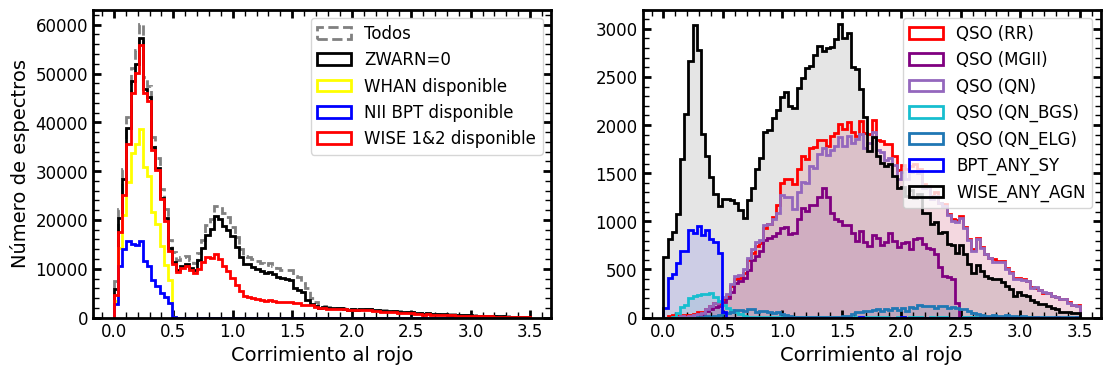

In [15]:
# Etiquetas para la leyenda de la gráfica.
agnlabels = ['QSO (RR)', 'QSO (MGII)', 'QSO (QN)', 'QSO (QN_BGS)', 'QSO (QN_ELG)', 'BPT_ANY_SY', 'WISE_ANY_AGN']

# Nombres de los tipos de AGN en la máscara de bits agn_maskbits
agntypes = ['RR', 'MGII', 'QN', 'QN_BGS', 'QN_ELG', 'BPT_ANY_SY', 'WISE_ANY_AGN']

# Colores para la gráfica.
colors = ['red', 'purple', 'tab:purple', 'tab:cyan', 'tab:blue', 'blue', 'black']

# Inicializar nuestra figura para 2 subgraficas una al lado de la otra.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), sharex=True)

# Definir nuestro rango de corrimiento al rojo 0 < z < 3,5
rangeZ = (0, 3.5)

# Panel izquierdo; catálogo completo + sólo desplazamientos al rojo seguros
# Para obtener más información sobre lo que significan estos parámetros y sus opciones: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
ax1.hist(T['z'], bins=100, range=(rangeZ), histtype='step', lw=2, color='gray', ls='--', label='Todos')
ax1.hist(T['z'][T['zwarn']==0], bins=100, range=(rangeZ), histtype='step', lw=2, color='k', label='ZWARN=0')

# WHAN disponible
ax1.hist(T['z'][(T['zwarn']==0)&(T['opt_uv_type'] & opt_uv_type.WHAN != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='yellow', label='WHAN disponible')

# NII BPT disponible
ax1.hist(T['z'][(T['zwarn']==0)&(T['opt_uv_type'] & opt_uv_type.NII_BPT != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='blue', label='NII BPT disponible')

# WISE 1 y 2 disponibles
ax1.hist(T['z'][(T['zwarn']==0)&(T['ir_type'] & ir_type.WISE_W12 != 0)], bins=100,
         range=(rangeZ), histtype='step', lw=2, color='red', label='WISE 1&2 disponible')

# Panel derecho; Mostrar distribuciones por tipo de AGN
for i, agn in enumerate(agntypes):
    typeFilter = (T['agn_maskbits'] & agn_maskbits[agn] != 0)
    typeColor = colors[i]
    typeLabel = agnlabels[i]
    # Vamos a dividir la declaración de este histograma del lado derecho.
    # La primera línea forma un histograma sólido y transparente.
    ax2.hist(T['z'][typeFilter], bins=100, range=(rangeZ), alpha=0.1, color=typeColor)
    # Esta segunda línea crea un histograma de nueva línea para los mismos datos.
    ax2.hist(T['z'][typeFilter], bins=100, range=(rangeZ), histtype='step', lw=2, color=typeColor, label=typeLabel)
    # Juntos, crean la apariencia de "vidrio pintado" en el lado derecho de la gráfica.


# Etiquetas de eje
ax1.set_xlabel('Corrimiento al rojo')
ax1.set_ylabel('Número de espectros')
ax2.set_xlabel('Corrimiento al rojo')

# Leyendas
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.show()
         

<a class="anchor" id="bpt"></a>
### Diagramas de diagnóstico BPT

Vamos a cubrir cómo crear gráficos [BPT](https://ui.adsabs.harvard.edu/abs/1981PASP...93....5B/abstract), una colección de gráficos que utilizan log(\[OIII\]$_{5007}$/H$\beta$) como eje y y:
* ($\textbf{a}$) log(\[NII\]$_{6584}$/H$\alpha$)
* ($\textbf{b}$) log(\[SII\]$_{6717, 6731}$/H$\alpha$)
* ($\textbf{c}$) log(\[OI\]$_{6300}$/H$\alpha$)
  
como sus ejes x.

El BPT \[NII\] tiene regiones definidas por:
* Formación Estelar vs AGN, [Kewley et al. (2001)](https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract)
* Formación Estelar vs Compuesto, [Kauffmann et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract)
* Seyfert vs LINER, [Schawinsky et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1415S/abstract)

El \[SII\] BPT tiene regiones definidas por:
* Formación Estelar vs AGN, [Law et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915...35L/abstract)
* Seyfert vs LINER, [Kewley et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006MNRAS.372..961K/abstract)
* Crédito a [Veilleux & Osterbrock (1987)](https://ui.adsabs.harvard.edu/abs/1987ApJS...63..295V/abstract)

El BPT \[OI\] tiene regiones definidas por:
* Formación Estelar vs AGN, [Law et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...915...35L/abstract)
* Seyfert vs LINER, [Kewley et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006MNRAS.372..961K/abstract)
* Crédito a [Veilleux & Osterbrock (1987)](https://ui.adsabs.harvard.edu/abs/1987ApJS...63..295V/abstract)

Para graficar estos diagramas BPT necesitaremos calcular los registros de estas proporciones de líneas para nuestra muestra consultada.

In [16]:
# Calcular los registros de las proporciones utilizando las matemáticas vectorizadas de numpy, los resultados son tablas de astropy de una sola columna
x_bptnii = np.log10(T['nii_6584_flux']/T['halpha_flux'])
x_bptsii = np.log10((T['sii_6716_flux']+T['sii_6731_flux'])/(T['halpha_flux']))
x_bptoi = np.log10(T['oi_6300_flux']/T['halpha_flux'])
y_bpt = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

Ahora que tenemos nuestras proporciones logarítmicas, debemos filtrarlas por tipo de BPT. Si necesita revisar cómo aplicar estos filtros, consulte [Aplicación de máscaras de bits](#filter)

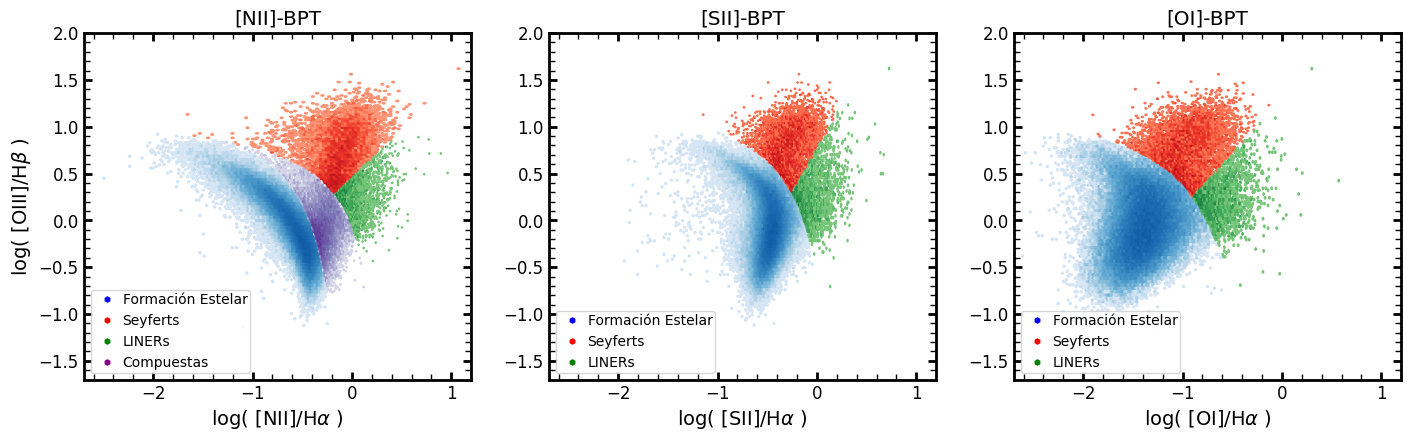

In [17]:
# Vamos a crear filtros para aplicar a nuestras tablas de proporciones logarítmicas anteriores para graficar los tres diagramas BPT.
# Usaremos matplotlib hexbins, para obtener más información sobre ellos: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# Formación Estelar NII
is_nii_sf = (T['opt_uv_type'] & opt_uv_type.NII_SF != 0)
# Seyfert NII
is_nii_sy = (T['opt_uv_type'] & opt_uv_type.NII_SY != 0)
# LINER NII
is_nii_lin = (T['opt_uv_type'] & opt_uv_type.NII_LINER != 0)
# Compuesto NII
is_nii_comp = (T['opt_uv_type'] & opt_uv_type.NII_COMP != 0)

# Filtros tipo SII BPT
# Formación Estelar SII
is_sii_sf = (T['opt_uv_type'] & opt_uv_type.SII_SF !=0)
# Seyfert NII
is_sii_sy = (T['opt_uv_type'] & opt_uv_type.SII_SY != 0)
# LINER NII
is_sii_lin = (T['opt_uv_type'] & opt_uv_type.SII_LINER != 0)

# Filtros tipo OI BPT
# OI Formación Estelar
is_oi_sf = (T['opt_uv_type'] & opt_uv_type.OI_SF != 0)
# OI Syfert
is_oi_sy = (T['opt_uv_type'] & opt_uv_type.OI_SY != 0)
# LINER OI
is_oi_lin = (T['opt_uv_type'] & opt_uv_type.OI_LINER != 0)

# Establecer algunos parámetros de la gráfica
norm_min, norm_max = 0.3, 300

# Inicializar la figura
plt.figure(figsize=(17, 4.5))

# Diagrama NII BPT
plt.subplot2grid((1,3), (0, 0)) # gráfica más a la izquierda
plt.title('[NII]-BPT')
plt.hexbin(x_bptnii[is_nii_sf], y_bpt[is_nii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # NII Galaxias de Formación Estelar
plt.hexbin(x_bptnii[is_nii_sy], y_bpt[is_nii_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # NII Seyferts
plt.hexbin(x_bptnii[is_nii_lin], y_bpt[is_nii_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # LINER NII
plt.hexbin(x_bptnii[is_nii_comp], y_bpt[is_nii_comp], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Purples') # Compuestas NII
plt.xlabel('log( [NII]/H$\\alpha$ )')
plt.ylabel('log( [OIII]/H$\\beta$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=6, label='Compuestas')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

# Diagrama SII BPT
plt.subplot2grid((1,3), (0, 1)) # gráfica intermedia
plt.title('[SII]-BPT')
plt.hexbin(x_bptsii[is_sii_sf], y_bpt[is_sii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # SII Galaxias de Formación Estelar
plt.hexbin(x_bptsii[is_sii_sy], y_bpt[is_sii_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # SII Seyferts
plt.hexbin(x_bptsii[is_sii_lin], y_bpt[is_sii_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # LINER SII
plt.xlabel('log( [SII]/H$\\alpha$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

# Diagrama OI BPT
plt.subplot2grid((1,3), (0, 2)) # gráfica más a la derecha
plt.title('[OI]-BPT')
plt.hexbin(x_bptoi[is_oi_sf], y_bpt[is_oi_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # OI Galaxias de Formación Estelar
plt.hexbin(x_bptoi[is_oi_sy], y_bpt[is_oi_sy], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # OI Seyferts
plt.hexbin(x_bptoi[is_oi_lin], y_bpt[is_oi_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # LINER OI
plt.xlabel('log( [OI]/H$\\alpha$ )')
plt.xlim(-2.7, 1.2)
plt.ylim(-1.7, 2)
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='Seyferts'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='g', markersize=6, label='LINERs')
]
plt.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.8, handletextpad=0.1, borderpad=0.2)

plt.show()

¡Se ven bastante bien! ¡Pero todavía tenemos algunos diagnósticos que podemos graficar!

<a class="anchor" id="diagnóstico"></a>
### Diagramas de diagnóstico AGN adicionales

Todavía tenemos:
* Diagrama He II
* Diagrama WHAN
* Diagrama azul
* Diagrama MEx
* Diagrama KEx
* colores WISE

¡Hagámoslos en orden a continuación!

<a class="anchor" id="heii"></a>
#### 1) El diagrama de diagnóstico del He II

Este diagnóstico proviene de [Shirazi & Brinchmann, (2021)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.421.1043S/abstract) y grafica log(He II$_{4686}$/$\textbf{H}\beta$) versus log(\[NII\]$_{6584}$/$\textbf{H}\alpha$) y se encontró mediante comparación por pares de ubicaciones en el diagrama tradicional NII BPT y este diagrama de diagnóstico He II más nuevo.

In [18]:
# Calcular las proporciones logarítmicas
x_bptnii = np.log10(T['nii_6584_flux']/T['halpha_flux'])
y_bptheii = np.log10(T['heii_4686_flux']/T['hbeta_flux'])

# Crea nuestros filtros
is_heii_sf = (T['opt_uv_type'] & opt_uv_type.HEII_SF != 0)
is_heii_agn = (T['opt_uv_type'] & opt_uv_type.HEII_AGN != 0)

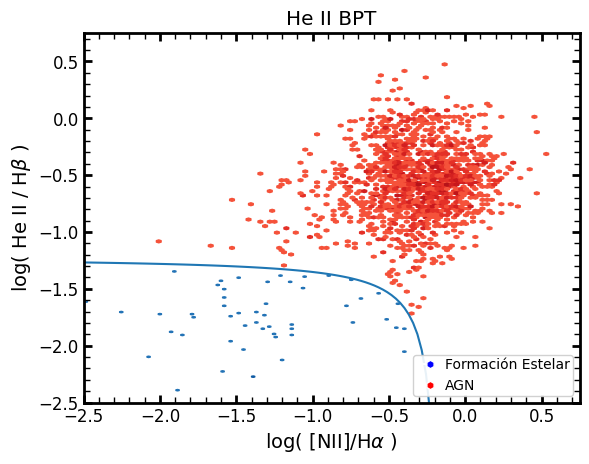

In [19]:
# Ahora creamos nuestra gráfica hexbin, esta vez con la línea de demarcación prescrita por Shirazi & Brinchmann.

x_heii_line = np.linspace(-3, -0.2, 100)
y_heii_line = -1.22+(1/(8.92*x_heii_line+1.32))

norm_min, norm_max = 0.3, 300
color = cm.PuRd(0.5)

plt.title('He II BPT')
plt.hexbin(x_bptnii[is_heii_sf], y_bptheii[is_heii_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # Formación Estelar HeII 
plt.hexbin(x_bptnii[is_heii_agn], y_bptheii[is_heii_agn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # AGN HeII
plt.plot(x_heii_line, y_heii_line) # Demarcación de Shirazi y Brinchmann (2012)

plt.xlabel('log( [NII]/H$\\alpha$ )')
plt.ylabel('log( He II / H$\\beta$ )')
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='b', markersize=6, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='r', markersize=6, label='AGN')
]
plt.xlim(-2.5, 0.75)
plt.ylim(-2.5, 0.75)
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.9, handletextpad=0.1, borderpad=0.2)
plt.show()

La gráfica anterior es bastante escasa en la región de formación estelar para nuestra muestra inicial de 1.000.000 de galaxias. Esto indica que la línea de emisión de He II rara vez se detecta en los espectros DESI de galaxias con Formación Estelar.

<a class="anchor" id="whan"></a>
#### 2) WHAN: W$_{H\alpha}$ contra log(\[NII\]/H$\alpha$)

Los diagramas WHAN fueron desarrollados por [Cid Fernández et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.413.1687C/abstract) y delimita entre 5 fuentes primarias de ionización dentro de una galaxia:
* Formación estelar pura: W$_{H\alpha}$ > 3 Å y log(\[NII\]/H$\alpha$) < -0,4
* AGN fuerte: W$_{H\alpha}$ > 6 Å y log(\[NII\]/H$\alpha$) > -0,4
* AGN débil: 3 Å < W$_{H\alpha}$ < 6 Å y log(\[NII\]/H$\alpha$) > -0,4
* Galaxias retiradas: W$_{H\alpha}$ < 3 Å
* Galaxias pasivas/sin líneas: W$_{H\alpha}$ < 0,5 Å y W\[NII\] < 0,5 Å

In [20]:
# Crear un filtro que seleccione la disponibilidad de WHAN
is_whan = (T['opt_uv_type'] & opt_uv_type.WHAN != 0)

# Crear un subcatálogo de T aplicando este filtro
T_WHAN = T[is_whan]

# Calcular la relación de líneas y obtenga W$_{H\alpha}$
x_whan = np.log10(T_WHAN['nii_6584_flux']/T_WHAN['halpha_flux'])
y_whan = T_WHAN['halpha_ew']

# Filtros para nuestros diferentes tipos de WHAN
is_whan_sf = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_SF != 0) # Formación Estelar
is_whan_sagn = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_SAGN != 0) # AGN fuerte
is_whan_wagn = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_WAGN != 0) # AGN débil
is_whan_ret = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_RET != 0) # Retiradas
is_whan_pass = (T_WHAN['opt_uv_type'] & opt_uv_type.WHAN_PASS != 0) # Pasivas

# Específicamente para galaxias pasivas, vamos a filtrar anchos H\alfa negativos.
x_passive = x_whan[is_whan_pass]
y_passive = y_whan[is_whan_pass]
passive_mask = y_passive > 0
x_passive = x_passive[passive_mask]
y_passive = y_passive[passive_mask]

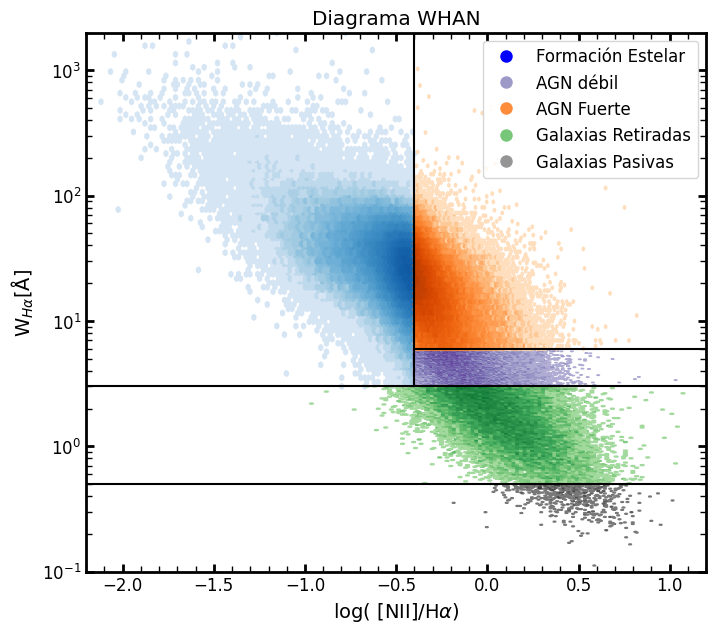

In [21]:
# Inicializar las propiedades de la figura para graficar
plt.figure(figsize=(8, 7))
plt.title('Diagrama WHAN')
norm_min, norm_mask = 0.3, 300

# Graficar cada tipo de WHAN
plt.hexbin(x_whan[is_whan_sf], y_whan[is_whan_sf], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Blues') # Formación Estelar
plt.hexbin(x_whan[is_whan_wagn], y_whan[is_whan_wagn], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Purples') # AGN débil
plt.hexbin(x_whan[is_whan_sagn], y_whan[is_whan_sagn], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Oranges') # AGN fuerte
plt.hexbin(x_whan[is_whan_ret], y_whan[is_whan_ret], bins=100, norm=LogNorm(norm_min, norm_mask), yscale='log', cmap='Greens') # Retiradas
plt.hexbin(x_passive, y_passive, bins = 100, norm=LogNorm(norm_min, norm_max), yscale='log', cmap='Grays') # Pasivas

# Graficar líneas de demarcación
plt.plot([-0.4, -0.4], [3, 2e3], color='black') # Límite de Formación Estelar
plt.plot([-0.4, 1.2], [6, 6], color='black') # Fuerte límite de AGN
plt.axhline(y=3, color='black') # Límite de Retiradas
plt.axhline(y=0.5, color='black') # Límite de Pasivas

# Ejes y etiquetas
plt.xlabel('log( [NII]/H$\\alpha$)')
plt.ylabel('W$_{H\\alpha}$[Å]')

plt.xlim(-2.2, 1.2)
plt.ylim(0.1, 2e3)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Formación Estelar', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='AGN débil', markerfacecolor=cm.Purples(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='AGN Fuerte', markerfacecolor=cm.Oranges(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Galaxias Retiradas', markerfacecolor=cm.YlGn(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Galaxias Pasivas', markerfacecolor=cm.Greys(0.5), markersize=10),
]

plt.legend(handles=legend_elements, loc='best')
plt.show()

<a class="anchor" id="azul"></a>
#### 3) Diagrama azul

El diagrama azul fue desarrollado por Lamareille et al. ([2004](https://academic.oup.com/mnras/article/350/2/396/1112879), [2010](https://www.aanda.org/articles/aa/pdf/2010/01/aa13168-09.pdf)) para clasificar galaxias de líneas de emisión utilizando el \[OII\]$_{3726, 3729}$, \[OIII\]$_{5007}$ y H$\beta$ líneas.

El diagrama azul clasifica las galaxias en Formación Estelar, Seyfert 2, LINER y Compuestas, siendo las Compuestas mezclas de Formación estelar/LINER o mezclas de Formación estelar/AGN.

In [22]:
# Crea nuestro subcatálogo y filtros disponibles AZUL
is_blue = (T['opt_uv_type'] & opt_uv_type.BLUE != 0)
T_BLUE = T[is_blue]
is_blue_sf = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SF != 0) # Formación estelar
is_blue_agn = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_AGN != 0) # AGN
is_blue_lin = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_LINER != 0) # LINER
is_blue_slc = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SLC != 0) # Formación estelar/LINER
is_blue_sfagn = (T_BLUE['opt_uv_type'] & opt_uv_type.BLUE_SFAGN != 0) # Formación estelar/AGN

In [23]:
# Calcular coeficientes de líneas
x_blue = np.log10((T_BLUE['oii_3726_ew'] + T_BLUE['oii_3729_ew'])/T_BLUE['hbeta_ew'])
y_blue = np.log10(T_BLUE['oiii_5007_flux']/T_BLUE['hbeta_flux'])

# Líneas de demarcación
x_blue_mainline = np.linspace(-2, 0.9, 200)
x_blue_slc = np.linspace(0.09, 1.06)
y_blue_mainline = 0.11/(x_blue_mainline-0.92) + 0.85
y_blue_slc_a = -(x_blue_slc - 1)**2 - 0.1*x_blue_slc + 0.25
y_blue_slc_b = (x_blue_slc -0.2)**2 - 0.6

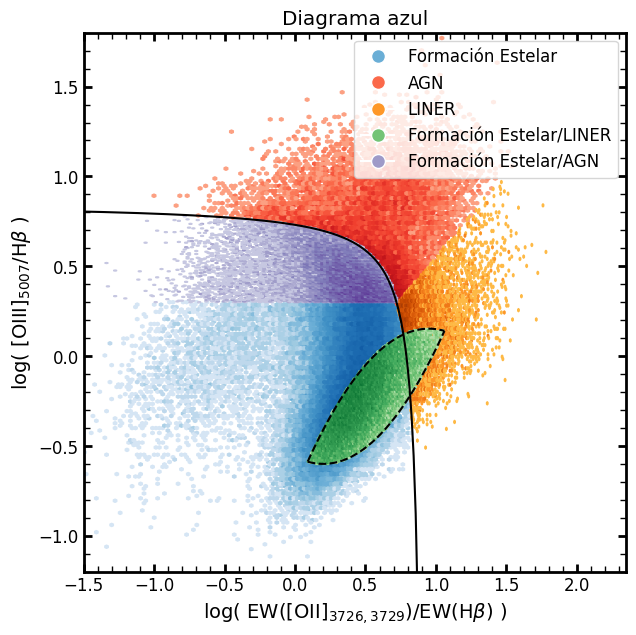

In [24]:
# Inicializar figura
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(7, 7))
plt.title('Diagrama azul')

plt.hexbin(x_blue[is_blue_sf], y_blue[is_blue_sf], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Blues') # Formación Estelar
plt.hexbin(x_blue[is_blue_agn], y_blue[is_blue_agn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Reds') # AGN
plt.hexbin(x_blue[is_blue_lin], y_blue[is_blue_lin], bins=100, norm=LogNorm(norm_min, norm_max), cmap='YlOrBr') # LINER
plt.hexbin(x_blue[is_blue_slc], y_blue[is_blue_slc], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Greens') # Formación Estelar/LINER
plt.hexbin(x_blue[is_blue_sfagn], y_blue[is_blue_sfagn], bins=100, norm=LogNorm(norm_min, norm_max), cmap='Purples') # Formación estelar/AGN

plt.plot(x_blue_mainline, y_blue_mainline, color='black')
plt.plot(x_blue_slc, y_blue_slc_a, color='black', ls='--')
plt.plot(x_blue_slc, y_blue_slc_b, color='black', ls='--')

plt.xlim(-1.5, 2.35)
plt.ylim(-1.2, 1.8)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Formación Estelar', markerfacecolor=cm.Blues(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='AGN', markerfacecolor=cm.Reds(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='LINER', markerfacecolor=cm.YlOrBr(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Formación Estelar/LINER', markerfacecolor=cm.Greens(0.5), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Formación Estelar/AGN', markerfacecolor=cm.Purples(0.5), markersize=10)
]
plt.legend(handles=legend_elements, loc='best')
plt.xlabel('log( EW([OII]$_{3726, 3729}$)/EW(H$\\beta$) )')
plt.ylabel('log( [OIII]$_{5007}$/H$\\beta$ )')
plt.show()

<a clase="ancla" id="mex"></a>
#### 4) MEx: diagrama de Diagnóstico de Excitación de Masa

El Diagnóstico de Excitación de Masa es un diagnóstico empírico de Juneau et al. ([2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736..104J/abstract), [2014](https://ui.adsabs.harvard.edu/abs/2014ApJ...788...88J/abstract)) que clasifica las galaxias como de formación estelar, AGN o Intermedio/Compuesto basado en su masa estelar (log(M$_{*}$/M$_{☉}$)) y relaciones de líneas de emisión (log(\[OIII\]/H$\beta$)). Este diagnóstico es particularmente útil para galaxias con alto corrimiento al rojo donde H$\alpha$ y \[NII\] pueden no estar dentro del rango de observación óptica estándar.

In [25]:
# Obtener la masa estelar de la muestra consultada
mex_log_mass = T['logmstar']

# Calcular la relación de líneas
mex_oiii_hbeta = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

# Crear filtros
is_mex_sf = (T['opt_uv_type'] & opt_uv_type.MEX_SF != 0)
is_mex_agn = (T['opt_uv_type'] & opt_uv_type.MEX_AGN != 0)
is_mex_interm = (T['opt_uv_type'] & opt_uv_type.MEX_INTERM != 0)

# Definir las líneas de demarcación de 2014
# Límite de AGN vs Compuesto
def mex_upper_2014(x):
    a0, a1, a2, a3 = 410.24, -109.333, 9.71731, -0.288244
    return np.where(x <= 10, 0.375/(x - 10.5) + 1.14, a0 + a1*x + a2*x**2 + a3*x**3)

# Límite de Compuestas vs Formación Estelar
def mex_lower_2014(x):
    a0, a1, a2, a3 = 352.066, -93.8249, 8.32651, -0.246416
    return np.where(x <= 9.6, 0.375/(x - 10.5) + 1.14, a0 + a1*x + a2*x**2 + a3*x**3)

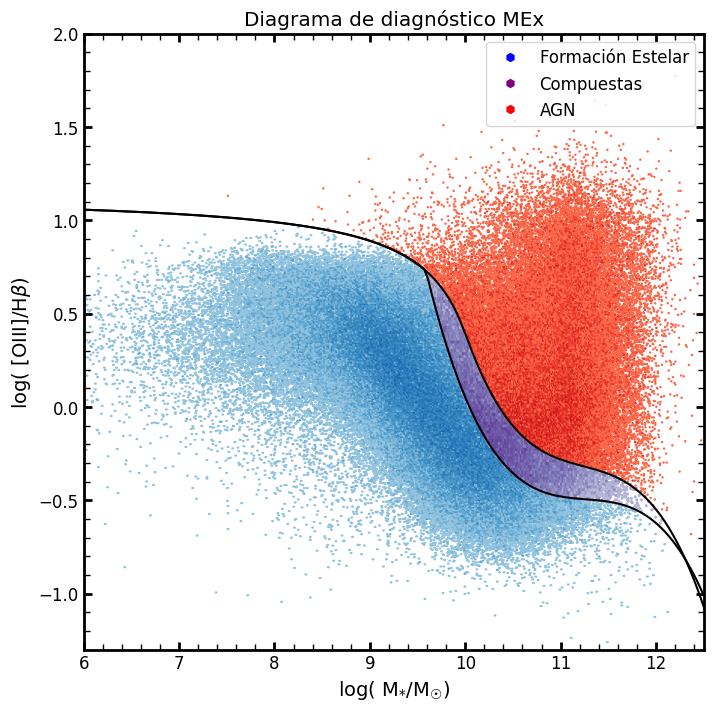

In [26]:
# Defina un rango de masas para entrar en las demarcaciones anteriores
mass_range = np.linspace(5.5, 13, 200)

# Inicializar la figura
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(8, 8))
plt.title('Diagrama de diagnóstico MEx')
gridsize = 500 # Haz los marcadores más pequeños.

plt.hexbin(mex_log_mass[is_mex_sf], mex_oiii_hbeta[is_mex_sf], bins=100, gridsize=gridsize, norm=LogNorm(norm_min, norm_max), cmap="Blues") # Formación Estelar
plt.hexbin(mex_log_mass[is_mex_interm], mex_oiii_hbeta[is_mex_interm], bins=100, gridsize=150, norm=LogNorm(norm_min, norm_max), cmap="Purples") # Compuesto
plt.hexbin(mex_log_mass[is_mex_agn], mex_oiii_hbeta[is_mex_agn], bins=100, gridsize=gridsize, norm=LogNorm(norm_min, norm_max), cmap="Reds") # AGN

# Graficar las demarcaciones
plt.plot(mass_range, mex_upper_2014(mass_range), color='black')
plt.plot(mass_range, mex_lower_2014(mass_range), color='black')

# Leyenda de la gráfica
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=8, label='Compuestas'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN')
]
plt.legend(handles=legend_elements, loc='best')

# Establecer límites X e Y
plt.xlim(6, 12.5)
plt.ylim(-1.3, 2)

# Establecer etiquetas
plt.xlabel('log( M$_{*}$/M$_{☉}$)')
plt.ylabel('log( [OIII]/H$\\beta$)')

plt.show()

<a clase="ancla" id="kex"></a>
#### 5) KEx: diagrama de diagnóstico de excitación cinemática

El diagrama KEx, desarrollado por Zhang & Hao ([2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...856..171Z/abstract)), clasifica las galaxias como Formadoras Estelares, AGN o compuestas/intermedias en función de su dispersión de velocidad (log($\sigma_{[OIII]}$)) y relaciones de líneas de emisión. (log(\[OIII\]/H$\beta$)). El uso de información cinemática por parte de KEx lo hace valioso para identificar AGN cuando los diagnósticos de masa estelar son inciertos.

In [27]:
# Configura nuestros filtros
is_kex_sf = (T['opt_uv_type'] & opt_uv_type.KEX_SF != 0)
is_kex_interm = (T['opt_uv_type'] & opt_uv_type.KEX_INTERM != 0)
is_kex_agn = (T['opt_uv_type'] & opt_uv_type.KEX_AGN != 0)

# Definir nuestras demarcaciones
# Límite AGN vs Formación Estelar
def kex_upper(sigma_log):
    return -2*sigma_log + 4.2

# Límite Formación Estelar vs Compuestas
def kex_lower(sigma_log):
    return np.full_like(sigma_log, 0.3) # Línea en y=3

# Establecer un rango sigma para estas demarcaciones
sigma_range = np.linspace(0, 3, 150)

In [28]:
# Extraer la dispersión de velocidad de la muestra consultada
log_sigma_oiii = np.log10(T['oiii_5007_sigma'])

# Calcular la relación de líneas
kex_oiii_hbeta = np.log10(T['oiii_5007_flux']/T['hbeta_flux'])

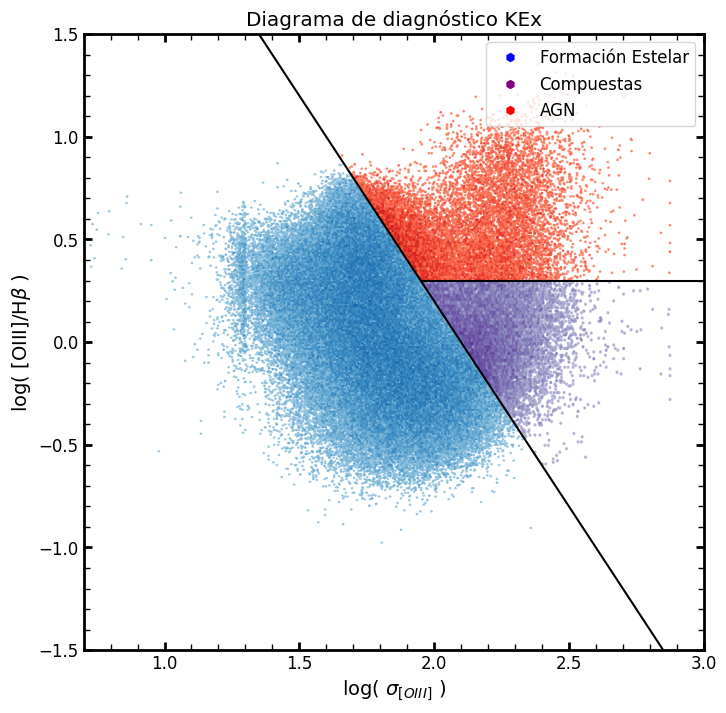

In [29]:
# Inicializar la figura
norm_min, norm_max = 0.3, 300
plt.figure(figsize=(8, 8))
plt.title('Diagrama de diagnóstico KEx')
gridsize=250

# Graficar los tipos KEx
plt.hexbin(log_sigma_oiii[is_kex_sf], kex_oiii_hbeta[is_kex_sf], bins=100, norm=LogNorm(norm_min, norm_max), gridsize=500, mincnt=1, cmap='Blues', alpha=0.7) # Formación Estelar
plt.hexbin(log_sigma_oiii[is_kex_interm], kex_oiii_hbeta[is_kex_interm], bins=100, norm=LogNorm(norm_min, norm_max), gridsize=150, mincnt=1, cmap='Purples', alpha=0.7) # Compuestas
plt.hexbin(log_sigma_oiii[is_kex_agn], kex_oiii_hbeta[is_kex_agn], bins=100, norm=LogNorm(norm_min, norm_max), gridsize=gridsize, mincnt=1, cmap='Reds', alpha=0.7) # AGN

# Graficar las curvas de demarcación.
plt.plot(sigma_range, kex_upper(sigma_range), color='black')
plt.plot(sigma_range[sigma_range > 1.95], kex_lower(sigma_range[sigma_range > 1.95]), color='black')

# Leyenda
legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Formación Estelar'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=8, label='Compuestas'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN')
]
plt.legend(handles=legend_elements, loc='best')

# Límites y etiquetas
plt.xlim(0.7, 3)
plt.xlabel('log( $\\sigma_{[OIII]}$ )')
plt.ylim(-1.5, 1.5)
plt.ylabel('log( [OIII]/H$\\beta$ )')

plt.show()

<a class="anchor" id="sabio"></a>
#### 6) Colores de WISE

Las magnitudes del infrarrojo medio (MIR) de WISE son un diagnóstico bien documentado y desarrollado para seleccionar AGN y galaxias con Formación Estelar; los colores rojos y la fotometría brillante pueden indicar la presencia de AGN. Los diagnósticos utilizan varias combinaciones de las cuatro bandas disponibles: W1 (3,4 $\mu$m), W2 (4,6 $\mu$m), W3 (12 $\mu$m) y W4 (22 $\mu$m). W4 es relativamente poco profundo en comparación con las otras bandas, por lo que la mayoría de los diagnósticos utilizan W1, W2, W3. Estos generalmente suponen que el MIR observado está rastreando la emisión del toro de polvo, por lo que puede ser menos confiable en corrimientos al rojo más altos donde este no es el caso.

Hay seis conjuntos de indicadores de diagnóstico WISE disponibles para datos DESI-DR1, correspondientes a:
* [Jarrett et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...735..112J/abstract)
* [Stern et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...753...30S/abstract)
* [Mateos et al. (2012)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract)
* [Assef et al. (2018)](https://ui.adsabs.harvard.edu/abs/2018ApJS..234...23A/abstract)
* [Yao et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...903...91Y/abstract)
* [Hviding et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022AJ....163..224H/abstract)

y las banderas correspondientes se pueden ver a continuación.

In [30]:
print(ir_type)

IR_TYPE:
  - [WISE_W12,         0, "WISE W1 and W2 available (update_AGNTYPE_WISE_colors)"]
  - [WISE_W123,        1, "WISE W1, W2 and W3 available"]
  - [WISE_AGN_J11,     2, "WISE diagnostic Jarrett et al. 2011 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_J11,      3, "WISE diagnostic Jarrett et al. 2011 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_S12,     4, "WISE diagnostic Stern et al. 2012 is AGN (based on W1,W2)"]
  - [WISE_SF_S12,      5, "WISE diagnostic Stern et al. 2012 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_M12,     6, "WISE diagnostic Mateos et al. 2012 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_M12,      7, "WISE diagnostic Mateos et al. 2012 is not an AGN (based on W1,W2,W3)"]
  - [WISE_AGN_A18,     8, "WISE diagnostic Assef et al. 2018 is AGN (based on W1,W2)"]
  - [WISE_SF_A18,      9, "WISE diagnostic Assef et al. 2018 is not an AGN (based on W1,W2)"]
  - [WISE_AGN_Y20,    10, "WISE diagnostic Yao et al. 2020 is AGN (based on W1,W2,W3)"]
  - [WISE_SF_Y20,   

Notas sobre la fotometría WISE:
* La fotometría WISE en el notebook original alojado en DESI provino del [catálogo fastspecfit](https://fastspecfit.readthedocs.io/en/latest/index.html) y fue [alojado por DESI](https://data.desi.lbl.gov/public/). Astro Data Lab tiene su propio alojamiento de la fotometría WISE y los flujos AB W1, W2, W3, W4 para objetivos de estudio en [https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.photometry](https://datalab.noirlab.edu/data-explorer?showTable=desi_dr1.photometry). Esta tabla se puede consultar al igual que el alojamiento del DESI DR1 AGN/QSO VAC en Astro Data Lab, aunque el AGN/QSO VAC viene con flujos W1, W2 y W3.
* W3 es generalmente menos confiable que W1 y W2 debido al agotamiento del refrigerante después del año 7 de NEOWISE.

In [31]:
# Crear filtros para fotometría WISE
is_w1w2 = (T['ir_type'] & ir_type.WISE_W12 != 0)
is_w1w2_only = ((T['ir_type'] & ir_type.WISE_W12 != 0) & (T['ir_type'] & ir_type.WISE_W123 == 0)) # Única fuente sin W3
is_w1w2w3 = (T['ir_type'] & ir_type.WISE_W123 != 0) # Fuentes con W1, W2 y W3

In [32]:
# Convierta los colores (W1-W2) y (W2-W3) a magnitudes AB
mag_w1 = -2.5*np.log10(T['flux_w1']) + 22.5
mag_w2 = -2.5*np.log10(T['flux_w2']) + 22.5
mag_w3 = -2.5*np.log10(T['flux_w3']) + 22.5
color_w1w2 = mag_w1 - mag_w2
color_w2w3 = mag_w2 - mag_w3

In [33]:
# Crear filtros para indicadores AGN
is_wise_agn_any = (T['agn_maskbits'] & agn_maskbits.WISE_ANY_AGN != 0) # AGN
is_wise_sf_any = (T['ir_type'] & ir_type.WISE_SF_J11 != 0) | \
                    (T['ir_type'] & ir_type.WISE_SF_S12 != 0) | \
                        (T['ir_type'] & ir_type.WISE_SF_M12 != 0) | \
                            (T['ir_type'] & ir_type.WISE_SF_A18 != 0) | \
                                (T['ir_type'] & ir_type.WISE_SF_Y20 != 0) | \
                                    (T['ir_type'] & ir_type.WISE_SF_H22 != 0) # O estos juntos (" | ") para tomar la unión de estas máscaras

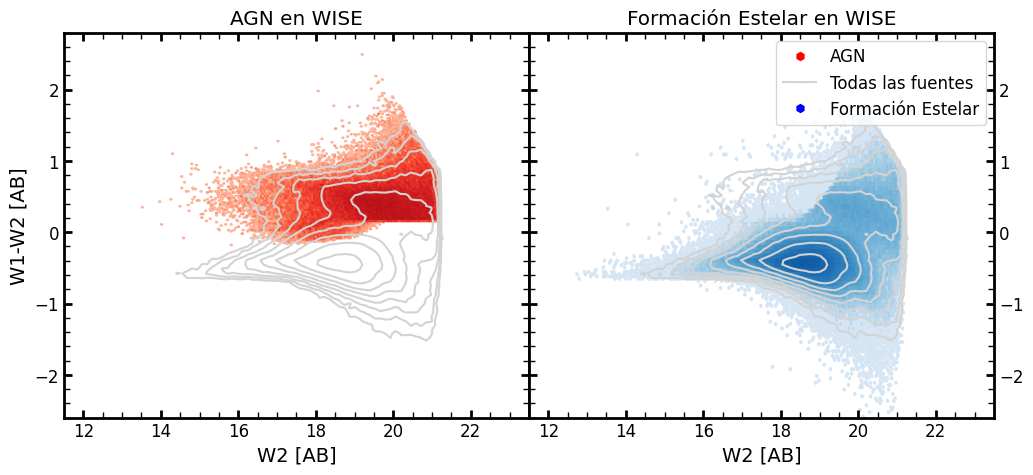

In [34]:
# Inicializar la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0) # Hace que las subgráficas se toquen
norm_min, norm_max = 0.3, 300

# Graficar AGN a la izquierda.
ax1.hexbin(mag_w2[is_w1w2&is_wise_agn_any], color_w1w2[is_w1w2&is_wise_agn_any], bins=100, gridsize=200, mincnt=1, norm=LogNorm(norm_min, norm_max), cmap='Reds')

# Graficar SF a la derecha
ax2.hexbin(mag_w2[is_w1w2&is_wise_sf_any], color_w1w2[is_w1w2&is_wise_sf_any], bins=100, gridsize=200, mincnt=1, norm=LogNorm(norm_min, norm_max), cmap='Blues')

# Agregar gráficos de contorno generales a ambos
dens_all,_,_ = np.histogram2d(mag_w2[is_w1w2], color_w1w2[is_w1w2], range=[[11, 24], [-3, 3]], bins=100, density=True)
dens_col_mag = dens_all.T

levels = np.power(10,np.arange(-2.3,1,0.3))

for ax in [ax1, ax2]:
    ax.set_xlabel('W2 [AB]', fontsize=14)
    ax.set_xlim(11.5,23.5)
    ax.set_ylim(-2.6,2.8)
    ax.contour(dens_col_mag, colors = 'lightgrey', extent = (11, 24, -3, 3), levels=levels)

ax2.tick_params(labelleft=False, labelright=True)
ax1.set_ylabel('W1-W2 [AB]', fontsize=14)

legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN'),
    Line2D([0], [0], marker='_', color='lightgray', markersize=8, label='Todas las fuentes'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Formación Estelar')
]
plt.legend(handles=legend_elements, loc='best')

ax1.set_title('AGN en WISE')
ax2.set_title('Formación Estelar en WISE')

plt.show()

Ahora haremos diagnósticos individuales, como Assef+18 o Jarrett+11. Estos, a diferencia del ejemplo anterior, son mutuamente excluyentes, por lo que un Assef+18 AGN no puede ser también un Assef+18 SF y viceversa.

In [35]:
# Assef+18 filtros
is_a18_agn = (T['ir_type'] & ir_type.WISE_AGN_A18 != 0) # Assef+18 AGN
is_a18_sf = (T['ir_type'] & ir_type.WISE_SF_A18 != 0) # Assef+18 SF

In [36]:
# Curva de confiabilidad de selección Assef+18 AGN de ese trabajo
def assef18_reliability(reliability=90):
    # 90% de confiabilidad
    alpha_90 = 0.65
    beta_90 = 0.153
    gamma_90 = 13.86        
                    
    # 75% de confiabilidad
    alpha_75 = 0.486
    beta_75 = 0.092
    gamma_75 = 13.07 
     
    # Elegir aquí (predeterminado 90%):
    alpha = alpha_90
    beta = beta_90
    gamma = gamma_90
    if reliability==75:
        alpha = alpha_75
        beta = beta_75
        gamma = gamma_75
     
    # Valores ficticios para W2 en magnitudes Vega
    xx = np.arange(8, 20, 0.1)
    
    # Compensaciones de las magnitudes Vega a AB (Jarrett+2011)
    W1_vega2ab = 2.699
    W2_vega2ab = 3.339
    W3_vega2ab = 5.174

    # Diagnóstico Assef+2018
    is_bright_a18 = xx<=gamma
    yy = alpha* np.exp(beta*(xx-gamma)**2)
    yy[is_bright_a18] = alpha
    
    # Devolución en magnitudes AB para DESI
    return(xx+W2_vega2ab, yy+(W1_vega2ab-W2_vega2ab))

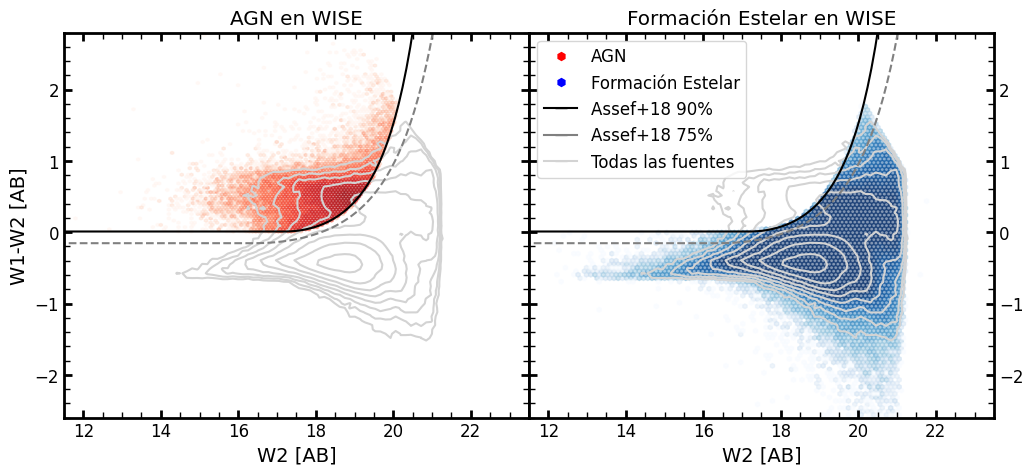

In [37]:
# Inicializar la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0) # Hace que las subgráficas se toquen
norm_min, norm_max = 1, 300

# Graficar A18 AGN a la izquierda
ax1.hexbin(mag_w2[is_a18_agn&is_w1w2], color_w1w2[is_a18_agn&is_w1w2], mincnt=1, gridsize=100, norm=LogNorm(norm_min, norm_max), alpha=0.5, label='AGN', cmap='Reds')

# Graficar A18 SF a la derecha.
ax2.hexbin(mag_w2[is_a18_sf&is_w1w2], color_w1w2[is_a18_sf&is_w1w2], mincnt=1, gridsize=100, norm=LogNorm(norm_min, norm_max), alpha=0.5, label='Formación Estelar', cmap='Blues')

# Agregar gráficos de contorno generales a ambos
dens_all,_,_ = np.histogram2d(mag_w2[is_w1w2], color_w1w2[is_w1w2], range=[[11, 24], [-3, 3]], bins=100, density=True)
dens_col_mag = dens_all.T

levels = np.power(10,np.arange(-2.3,1,0.3))

for ax in [ax1, ax2]:
    ax.set_xlabel('W2 [AB]', fontsize=14)
    ax.set_xlim(11.5,23.5)
    ax.set_ylim(-2.6,2.8)
    ax.contour(dens_col_mag, colors = 'lightgrey', extent = (11, 24, -3, 3), levels=levels)

ax2.tick_params(labelleft=False, labelright=True)
ax1.set_ylabel('W1-W2 [AB]', fontsize=14)

# Agregar curvas de confiabilidad a ambos
x_reliability_90, y_reliability_90 = assef18_reliability(reliability=90)
x_reliability_75, y_reliability_75 = assef18_reliability(reliability=75)
ax1.plot(x_reliability_90, y_reliability_90, color='black')
ax1.plot(x_reliability_75, y_reliability_75, ls='--', color='gray')
ax2.plot(x_reliability_90, y_reliability_90, color='black')
ax2.plot(x_reliability_75, y_reliability_75, ls='--', color='gray')

legend_elements = [
    Line2D([0], [0], marker='h', color='w', markerfacecolor='red', markersize=8, label='AGN'),
    Line2D([0], [0], marker='h', color='w', markerfacecolor='blue', markersize=8, label='Formación Estelar'),
    Line2D([0], [0], marker='_', color='black', markersize=8, label='Assef+18 90%'),
    Line2D([0], [0], marker='_', color='gray', markersize=8, label='Assef+18 75%'),
    Line2D([0], [0], marker='_', color='lightgray', markersize=8, label='Todas las fuentes')
]
plt.legend(handles=legend_elements, loc='best')

ax1.set_title('AGN en WISE')
ax2.set_title('Formación Estelar en WISE')

plt.show()